# Problem statement: It is a binary classification problem (onset of diabetes as 1 or not as 0) 


1. Importing required libraries
2. Data pre-processing 
  (i) Access and read data file (load the dataset) / or originate data 
  *(ii)Data scalling  
  (iii)Data splitting 
  (iv)Converting data into Pytorch tensor 
3. Modeling 
  (i) Building or creating model 
  (ii) Compile the model 
  (iii)Evaluate the model 
  (iv) Save the model 
4. Plotting 

*( train the model and evaluate the model)
we can train and evaluate model on same or different data


# import required libraries

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Data pre-processing 
 #Access and read data file (load the dataset)
 #Data splitting (split into input (X) and output (y) variables)

In [2]:
dataset = np.loadtxt('pima-indians-diabetes.csv.txt', delimiter=',')
X = dataset[:,0:8]    # index 0 to 7 = first 8 columns (all rows and coloumn till 7) # X Input value/input features =8
y = dataset[:,8]      # only column at index 8 ((all rows and only 8th coloumn)     # y Target value = 1
                                                         # y = f (X)
print(dataset) 
print(X) 
print(y) 

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.

# To convert, create a tensor out of NumPy arrays (EXTRA)

#PyTorch tensors first
#One reason is PyTorch operates in a 32-bit floating point while NumPy, by default, uses a 64-bit floating point.
#'reshape' operation used to change shape of y tensor. into a two-dimensional tensor where the number of rows is determined by -1 and the number of columns is set to 1 

In [3]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Building or creating model  

In [4]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12) # input = 8 , input layer neuron = 12 
        self.act1 = nn.ReLU()           # Activation function = ReLU  
        self.hidden2 = nn.Linear(12, 8) # 12 then  first hidden layer neuron = 12
        self.act2 = nn.ReLU()           # Activation function = ReLU 
        self.output = nn.Linear(8, 1)   # 8 then output layer neuron = 1 
        self.act_output = nn.Sigmoid()  #Activation function = sigmoid 
 
    def forward(self, x):   # forward function, x tensor 
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
 
 model = PimaClassifier()
print(model) 

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


# Compile the model 

In [5]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)   # adam, gradient descent 

# loss calculation= model_predictions, ground_truth # metric to measure the prediction’s distance to y
# learning rate = lr = 0.001
# optimizer: The Algorithm use to adjust the model weights progressively to produce better output.  

# Fit the model  (train the model/model training)

#Epoch: Passes the entire training dataset to the model once
#Batch: One or more samples passed to the model, from which the gradient descent algorithm will be executed for one iteration.

*The entire dataset is split into batches, and you pass the batches one by one into a model using a training loop. Once you have exhausted all the batches, you have finished one epoch.Then you can start over again with the same dataset and start the second epoch, continuing to refine the model. This process repeats until you are satisfied with the model’s output.

*epochs and iterations are related but represent different concepts in neural network training. An epoch is a complete pass through the dataset, and iterations are the smaller steps within each epoch, where model parameters are updated based on a batch of data.

*the amount of error reducing when in the later epochs, but it will eventually level out. This is called model convergence. 

In [6]:
loss_values = []
accuracy_values = []

n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print(f'Finished epoch {epoch}, latest loss {loss}')   
    
# LOOP USED IN PYTORCH WHILE FITTING THE MODEL
# epochs = 100
# batch size = 10 

    # Calculate accuracy after each epoch
    y_pred = model(X)
    accuracy = (y_pred.round() == y).float().mean()
    
    # Append loss and accuracy to the lists
    loss_values.append(loss.item())
    accuracy_values.append(accuracy.item())
    
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item()}, Accuracy: {accuracy.item()}")


Epoch [1/100], Loss: 0.557277262210846, Accuracy: 0.6796875
Epoch [2/100], Loss: 0.5193186402320862, Accuracy: 0.671875
Epoch [3/100], Loss: 0.4965742230415344, Accuracy: 0.6783854365348816
Epoch [4/100], Loss: 0.5018132925033569, Accuracy: 0.6783854365348816
Epoch [5/100], Loss: 0.4986136257648468, Accuracy: 0.68359375
Epoch [6/100], Loss: 0.4990239143371582, Accuracy: 0.6848958134651184
Epoch [7/100], Loss: 0.5153252482414246, Accuracy: 0.6901041865348816
Epoch [8/100], Loss: 0.5135143399238586, Accuracy: 0.6966145634651184
Epoch [9/100], Loss: 0.5126662850379944, Accuracy: 0.6979166865348816
Epoch [10/100], Loss: 0.5189967751502991, Accuracy: 0.7018229365348816
Epoch [11/100], Loss: 0.5227711796760559, Accuracy: 0.6940104365348816
Epoch [12/100], Loss: 0.5085604190826416, Accuracy: 0.7083333134651184
Epoch [13/100], Loss: 0.5068569779396057, Accuracy: 0.71484375
Epoch [14/100], Loss: 0.509658694267273, Accuracy: 0.71484375
Epoch [15/100], Loss: 0.49690139293670654, Accuracy: 0.71354

# Evaluate the model (testing model on test data/unseen data)

*have trained our neural network on the entire dataset, and also, evaluated the performance of the network on the same dataset.
This was done for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model. 

In [7]:
#compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)        #  y_pred = Making prediction on X (after passing through model)
 
accuracy = (y_pred.round() == y).float().mean() 
print(f"Accuracy {accuracy}")


Accuracy 0.7682291865348816


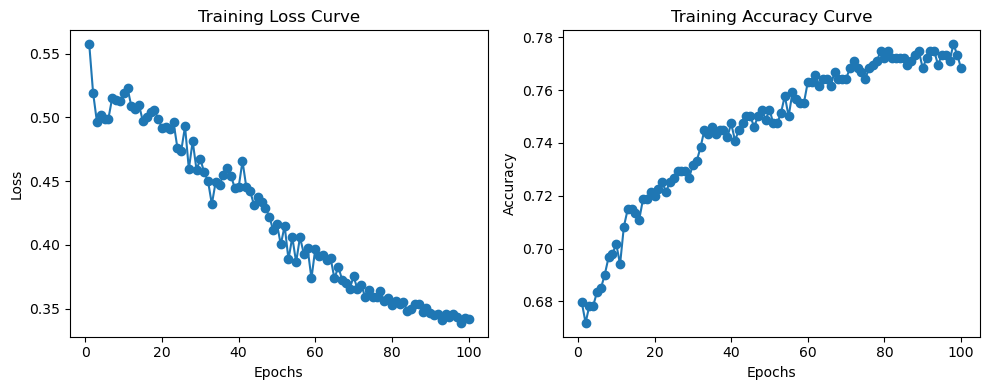

In [8]:
# Plot the learning curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), loss_values, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), accuracy_values, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')

plt.tight_layout()
plt.show()


# Make Predictions with the model

In [9]:
# make class predictions with the model
predictions = (model(X) > 0.5).int()                
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)
